In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
%matplotlib inline
import seaborn
seaborn.set()

matplotlib虽然功能强大，但是matplotlib相对而言较为底层，画图时步骤较为繁琐，比较麻烦，因为要画一张完整的图表，需要实现很多的基本组件，比如图像类型、刻度、标题、图例、注解等等。目前有很多的开源框架所实现的绘图功能是基于matplotlib的，pandas便是其中之一，对于pandas数据，直接使用pandas本身实现的绘图方法比matplotlib更加方便简单。

在pandas中，我们可能有多个数据列，并且带有行和列的标签。pandas自身有很多内建方法可以简化从DataFrame和Series对象生成可视化的过程。另一个是seaborn，它是由Michael Waskom创建的统计图形库。seaborn简化了很多常用可视化类型的生成。

**导入seaborn会修改默认的matplotlib配色方案和绘图样式，这会提高图表的可读性和美观性**。即使你不适用seaborn的API，你可能更喜欢导入seaborn来为通用matplotlib图表提供更好的视觉美观度。

## pandas绘图的基本接口
Series和DataFrame上的plot函数只是使用matplotlib库的plot()方法的简单包装实现。

Series
```python
plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
```

DataFrame
```python
plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False,
       layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, 
       style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None,
       ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None,
       secondary_y=False, sort_columns=False, **kwds)
```

```
kind:画图的种类，默认是 line，
ax:要在其上进行绘制的matplotlib.subplot对象，如果没有，则使用默认的subplot对象。 
figsize:图像尺寸，a tuple (width, height)
use_index:True(默认)，False。表示默认情况下，会将series和dataframe的index传给matplotlib，用已绘制X轴。
title：标题
grid：网格，boolean, default None (matlab style default)
legend：图例
style：绘图的风格，如‘ko--’，list or dict ，matplotlib line style per column
xticks=None,用做x刻度的值
yticks=None,用做Y轴刻度的值
xlim=None, X轴的界限如【0，10】，2-tuple/list
ylim=None,Y轴的界限，2-tuple/list
rot=None,  旋转刻度标签 0-360
fontsize=None

下面几个是DataFrame特有的
x : label or position, default None
y : label, position or list of label, positions, default None
sharex: 共用X轴
sharey：
```

可以看出DataFrame的中的 plot() 方法是一个非常高级的API，可调节的参数非常多、使用非常灵活，这也是pandas作为数据处理工具的强大体现。通过参数 x 和 y 能够指定作图的横纵轴；通过 kind 参数指定需要的图形，这个参数可以选择的值有：

* ‘line’ : 直线图 （默认）    
* ‘bar’ : 垂直条形图    
* ‘barh’ : 水平条形图    
* ‘hist’ : 直方图    
* ‘box’ : 箱型图    
* ‘kde’ : 核密度估计图    
* ‘density’ : 与核密度估计图类似    
* ‘area’ : 区域图    
* ‘pie’ : 饼图    
* ‘scatter’ : 散点图    
* ‘hexbin’ : 六边形分箱图

值得注意的是，在新版本的pandas中也可以使用诸如 plot.line() 方法调用相关的作图方法。

```python
plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
```

## 折线图

Series对象的索引传入matplotlib作为绘图的x轴，你可以通过传入use_index=False来禁用这个功能。x轴的刻度和范围可以通过xticks和xlim选项进行调整，相应地y轴使用yticks和ylim进行调整。

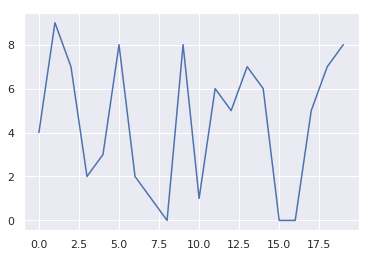

In [4]:
#x轴为index，y轴值为Series
s = pd.Series(np.random.randint(10,size=20))
s.plot()

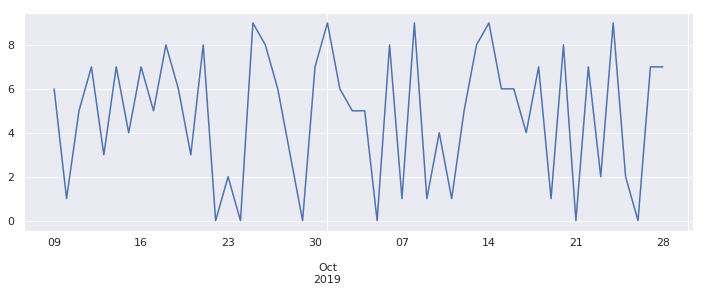

In [5]:
s = pd.Series(np.random.randint(10,size=50) ,index=pd.date_range('9/9/2019', periods=50))
s.plot(figsize=(12,4))

DataFrame的plot方法在同一个子图中将每一列绘制为不同的折线，并自动生成图例：

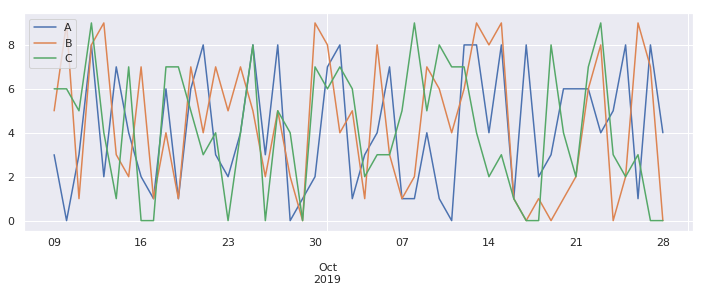

In [6]:
df = pd.DataFrame(np.random.randint(10,size=(50,3)) ,index=pd.date_range('9/9/2019', periods=50) ,
                                    columns=list('ABC'))
df.plot(figsize=(12,4))

可以使用以下x和y关键字 绘制一列与另一列的关系plot()：

In [7]:
df['x'] = pd.Series(np.arange(0, 100, 2) ,index=df.index)

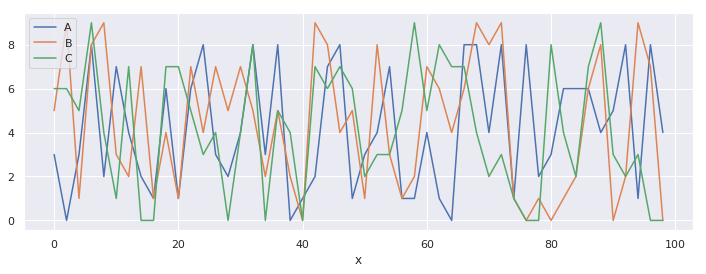

In [8]:
#以 x 列为横坐标，其他列都作为纵坐标：
df.plot(x='x' ,figsize=(12,4))

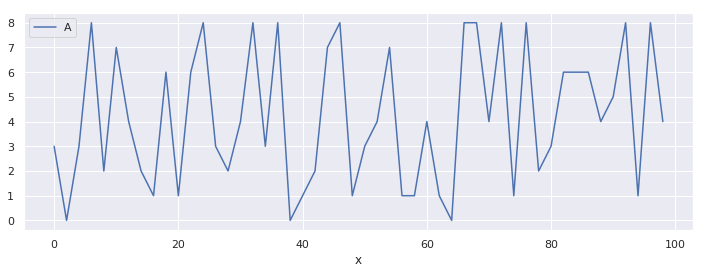

In [9]:
#以 x 列为横坐标，A列都作为纵坐标：
df.plot(x='x' , y='A' ,figsize=(12,4))

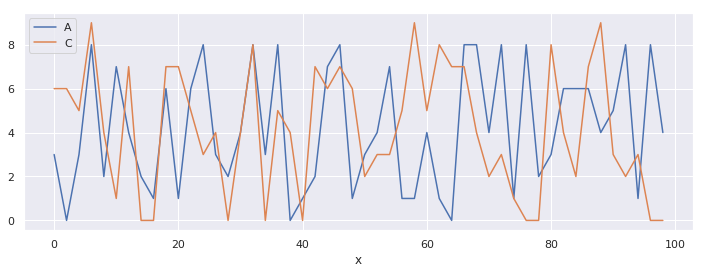

In [10]:
#以 x 列为横坐标，A、C列都作为纵坐标：
df.plot(x='x' , y=['A','C'] ,figsize=(12,4))

## 条形图(柱状图)
plot.bar()和plot.barh()可以分别绘制垂直和水平的柱状图。在绘制柱状图时，Series或DataFrame的索引将会被用作x轴刻度(bar)或y轴刻度(barh)：

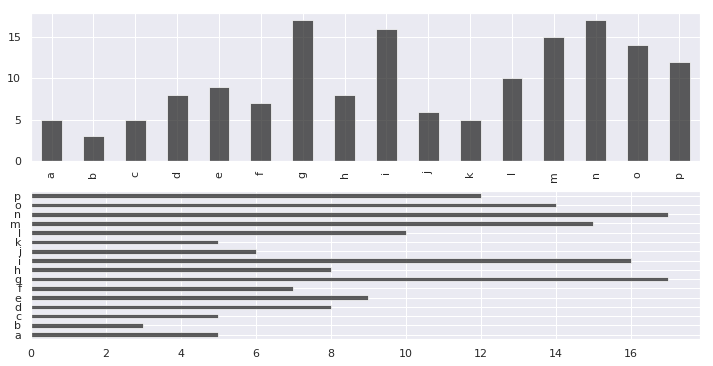

In [11]:
#选项color='k'和alpha=0.7将柱子的颜色设置为黑色，并将图像的填充色设置为部分透明。
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randint(20,size=16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7 ,figsize=(12,6))
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

选项color='k'和alpha=0.7将柱子的颜色设置为黑色，并将图像的填充色设置为部分透明。

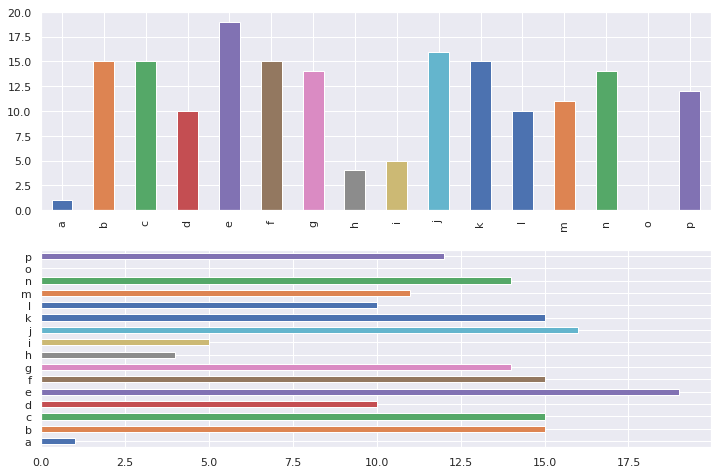

In [12]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randint(20,size=16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0] ,figsize=(12,6))
data.plot.barh(ax=axes[1] ,figsize=(12,8)) #设置了这个figsize，第一个子图也被撑大了

在DataFrame中，柱状图将每一行中的值分组到并排的柱子中的一组。

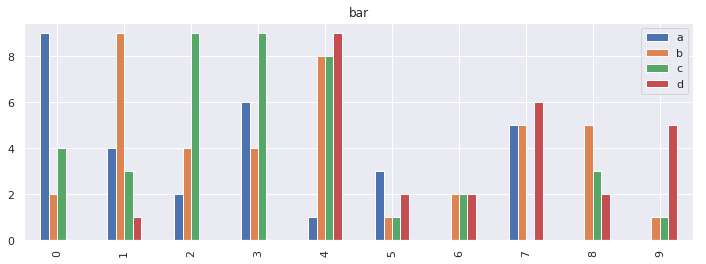

In [13]:
df = pd.DataFrame(np.random.randint(10,size=(10,4)),columns=['a','b','c','d'])
df.plot.bar(title='bar',figsize=(12,4))

DataFrame的列名称"Genus"被用作了图例标题。

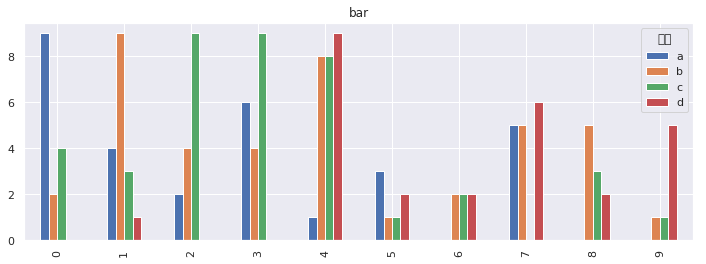

In [14]:
#DataFrame的列名称"Genus"被用作了图例标题。
df.columns.name="类别"
df.plot.bar(title='bar',figsize=(12,4))

使用bar()生成直方图，barh()生成水平条形图（要生成一个堆积条形图，通过指定：pass stacked=True）

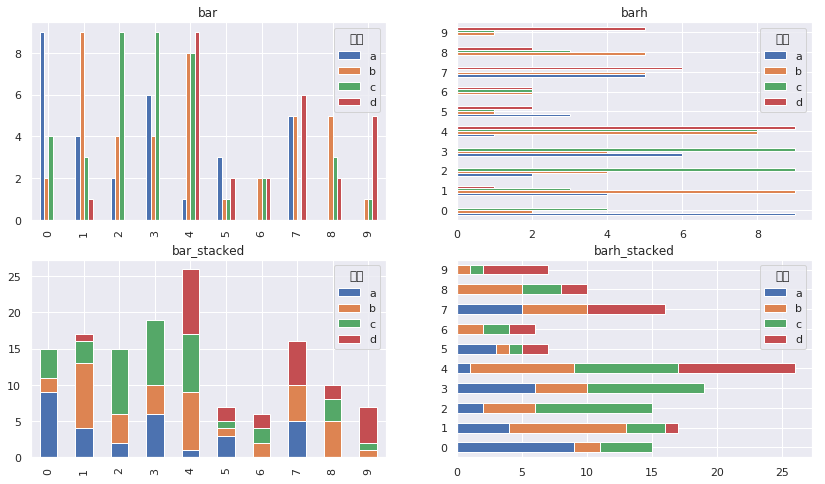

In [15]:
fig, ax = plt.subplots(2,2 ,figsize=(14,8))
# 使用bar()生成直方图，barh()生成水平条形图（要生成一个堆积条形图，通过指定：pass stacked=True）
df.plot.bar(ax=ax[0,0] ,title='bar')# 图1
df.plot.barh(ax=ax[0,1] ,title='barh')# 图2
df.plot.bar(ax=ax[1,0] ,title='bar_stacked' ,stacked=True)# 图3
df.plot.barh(ax=ax[1,1] ,title='barh_stacked' ,stacked=True)# 图4

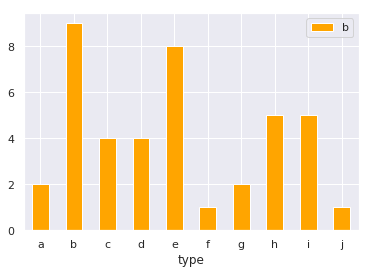

In [16]:
#以 type 列作为横坐标， b 列作为纵坐标，填充的颜色为 orange ，旋转角度为0 。
df['type'] = pd.Series(list('abcdefghijklmn')[:10])
df.plot.bar(x='type', y='b', color='orange', rot=0)

使用value_counts: s.value_counts().plot.bar()可以有效的对Series值频率进行可视化。

In [17]:
df['a'].value_counts()

0    3
9    1
6    1
5    1
4    1
3    1
2    1
1    1
Name: a, dtype: int64

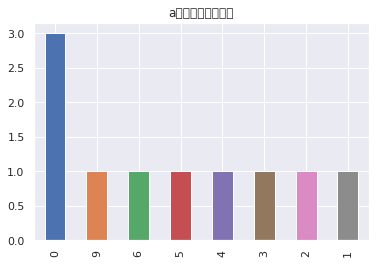

In [18]:
df['a'].value_counts().plot(kind='bar',title='a列各个值的的频率')

## 直方图
直方图是一种条形图，用于给出值频率的离散显示。数据点被分成离散的，均匀间隔的箱，并且绘制每个箱中数据点的数量。

使用**plot.hist()**方法绘制直方图。我们可以指定**bins**的数量值。

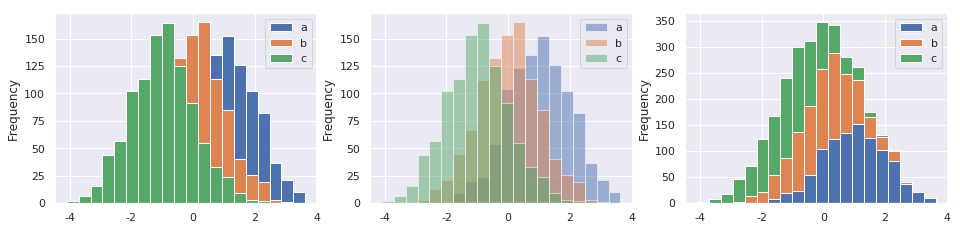

In [19]:
#np.random.randn标准正态分布
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1})
fig, ax = plt.subplots(1,3 ,figsize=(16,3.5))
df.plot.hist(ax=ax[0] ,bins=20)
df.plot.hist(ax=ax[1] ,alpha=0.5 ,bins=20)
#可以使用堆叠直方图stacked=True
df.plot.hist(ax=ax[2] ,stacked=True, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22a439ae10>,
      dtype=object)

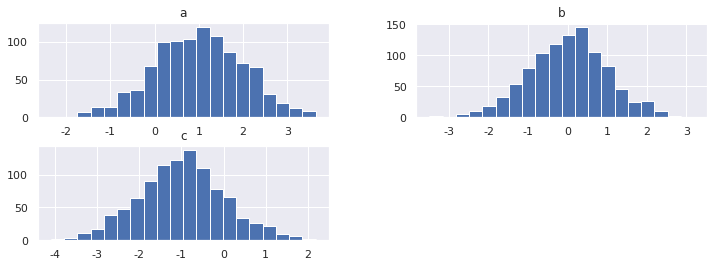

In [20]:
# 要为每列绘制不同的直方图，使用以下代码，会自动生成多个子图
df.hist(bins=20 ,figsize=(12,4))

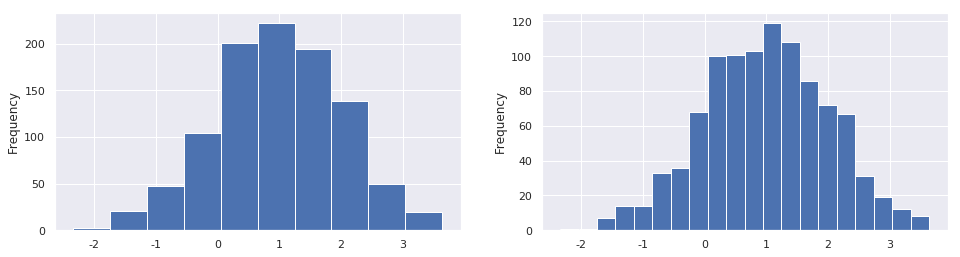

In [21]:
#Series的直方图
fig, ax = plt.subplots(1,2 ,figsize=(16,4))
df['a'].plot.hist(ax=ax[0] )#默认的bin
df['a'].plot.hist(ax=ax[1] ,bins=20)#设置bin等于20
#plt.text / ax.text 命令手动添加注释,它们可以在具体的 x / y 坐标点上放上文字
#测试标注
#ax[0].text(-2, 3, 3)

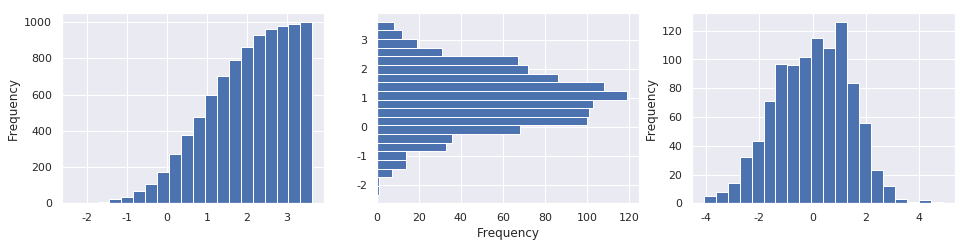

In [22]:
fig, ax = plt.subplots(1,3 ,figsize=(16,3.5))
#cumulative累计
df['a'].plot.hist(ax=ax[0] ,cumulative=True ,bins=20)
#orientation='horizontal'水平
df['a'].plot.hist(ax=ax[1] ,orientation='horizontal' ,bins=20)
#diff差分函数
df['a'].diff().plot.hist(ax=ax[2],bins=20)

pandas中shift和diff函数关系:
https://www.jb51.net/article/137878.htm

https://blog.csdn.net/You_are_my_dream/article/details/70022464

https://www.colabug.com/4832426.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f229fee9588>,
      dtype=object)

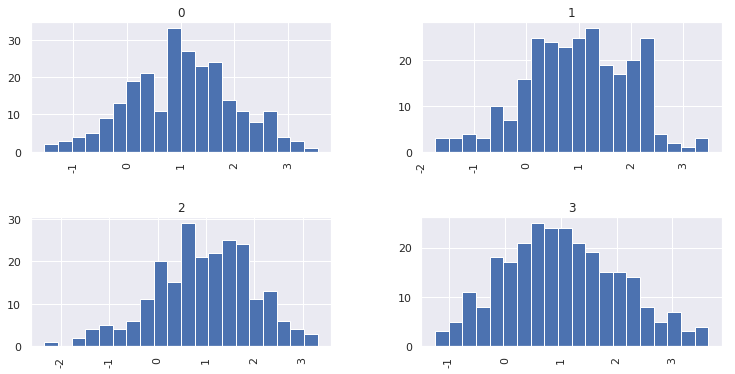

In [23]:
#该by关键字可以指定绘制分组直方图(0、1、2、3随机分成4组)：
df['a'].hist(by=np.random.randint(0, 4, len(df['a'])), bins=20 ,figsize=(12, 6))

## 密度图
密度图是一种与直方图相关的图表类型，它通过计算可能产生观测数据的连续概率分布估计而产生。通常的做法是将这种分布近似为“内核”的混合，也就是像正态分布那样简单的分布。因此，密度图也被成为内核密度估计图(KDE)。plot.kde使用传统法定混合法估计绘制密度图：可以使用Series.plot.kde()和DataFrame.plot.kde()方法创建密度图。

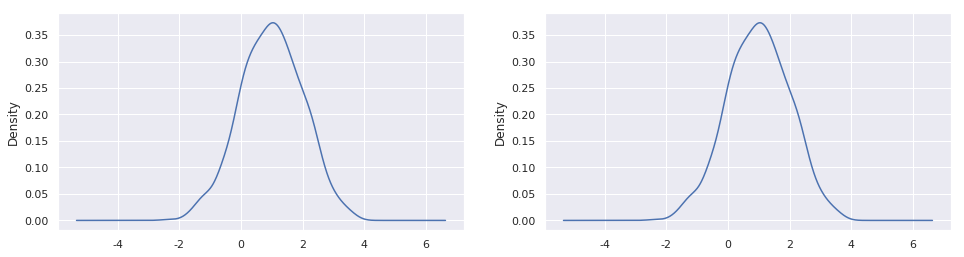

In [24]:
fig, ax = plt.subplots(1,2 ,figsize=(16,4))
df['a'].plot.kde(ax=ax[0])
df['a'].plot.density(ax=ax[1])

seaborn的distplot方法可以绘制直方图和连续密度估计，通过distplot方法使直方图和密度图的绘制更为简单。

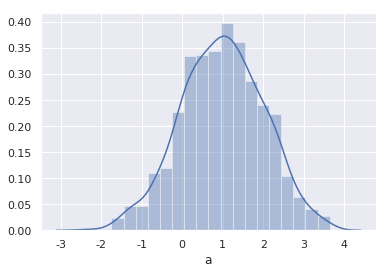

In [25]:
seaborn.distplot(df['a'], bins=20)

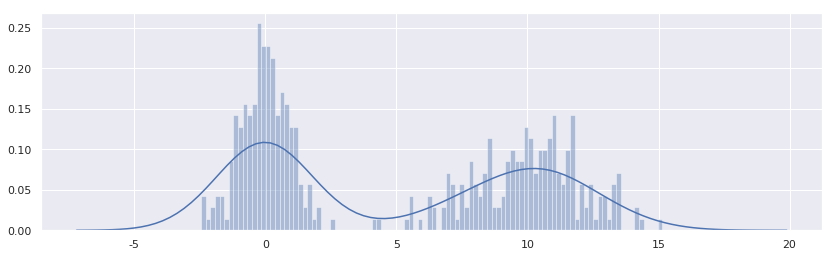

In [26]:
#由两个不同的标准正态分布组成的双峰分布
fig, ax = plt.subplots(figsize=(14,4))
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
seaborn.distplot(values, bins=100 ,ax=ax)#seaborn.distplot()函数没有figsize参数

## 区域块(area)图
可以使用Series.plot.area()或DataFrame.plot.area()方法创建区域图形。区域图是默认堆叠的。要生成堆积区域图，每列必须是全部正值或所有负值。

当输入数据包含NaN时，它将自动填充0.如果要删除或填充不同的值，请在调用plot之前使用dataframe.dropna()或dataframe.fillna()。

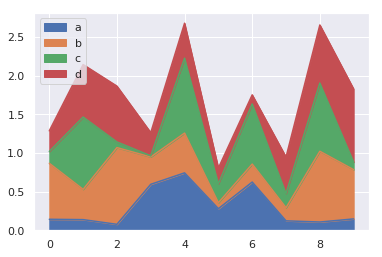

In [27]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

为了产生一个未被堆积的地块，通过stacked=False。除非另有说明，否则alpha值设置为0.5：

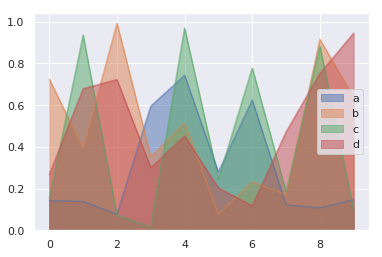

In [28]:
#为了产生一个未被堆积的地块，通过stacked=False。除非另有说明，否则alpha值设置为0.5：
df.plot.area(stacked=False)

## 散点图
可以使用该DataFrame.plot.scatter()方法绘制散点图。散点图需要x和y轴的数字列。这些可以通过x和y关键字指定。

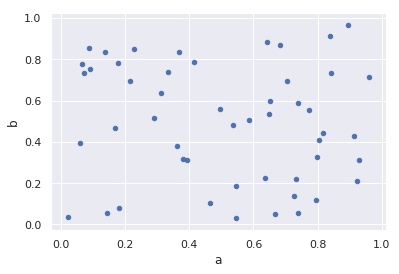

In [29]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

要在单个轴上绘制多个列组，请重复指定plot方法的ax属性。建议指定color和label关键字来区分每个组。

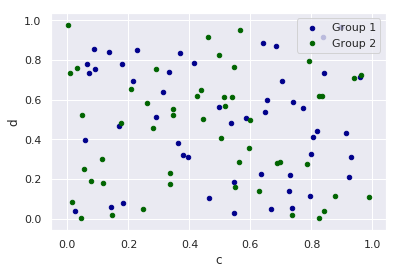

In [30]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

The keyword c may be given as the name of a column to provide colors for each point:

关键字c可以作为列的名称给出，以便为每个点提供颜色：

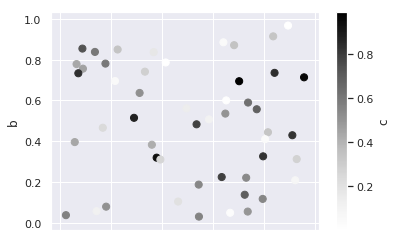

In [31]:
#c指定颜色，s指定每个点的大小
df.plot.scatter(x='a', y='b', c='c', s=50)

You can pass other keywords supported by matplotlib scatter. The example below shows a bubble chart using a column of the DataFrame as the bubble size.

可以传递matplotlib scatter支持的其他关键字。下面的示例显示了使用DataFrame气泡大小列的气泡图。

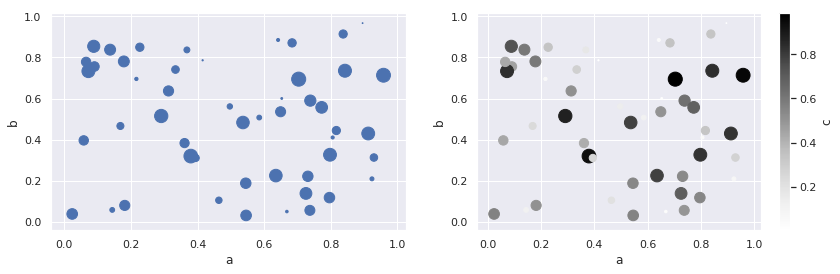

In [32]:
fig, ax = plt.subplots(1,2 ,figsize=(14,4))
df.plot.scatter(x='a', y='b', s=df['c'] * 200 ,ax=ax[0])
#可以看出来
df.plot.scatter(x='a', y='b', c='c', s=df['c'] * 200 ,ax=ax[1])

## 饼图
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

可以使用Series.plot.pie()或DataFrame.plot.pie()方法创建饼图。如果您的数据包含NaN，它们将自动填充0. 如果您的数据中存在任何负值，则会引发ValueError异常。

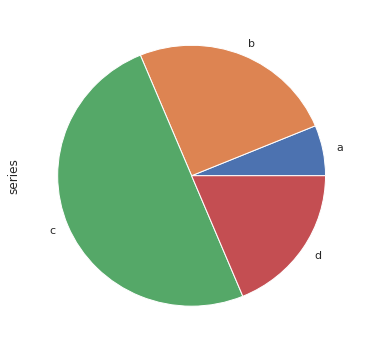

In [33]:
series = pd.Series([10,40,80,30],index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))

For pie plots it’s best to use square figures, i.e. a figure aspect ratio 1. You can create the figure with equal width and height, or force the aspect ratio to be equal after plotting by calling ax.set_aspect('equal') on the returned axes object.

对于饼图，最好使用方形图形，即图形纵横比1.您可以创建具有相等宽度和高度的图形，或者在绘制后通过调用ax.set_aspect('equal')返回的 axes对象强制纵横比相等。

Note that pie plot with DataFrame requires that you either specify a target column by the y argument or subplots=True. When y is specified, pie plot of selected column will be drawn. If subplots=True is specified, pie plots for each column are drawn as subplots. A legend will be drawn in each pie plots by default; specify legend=False to hide it.

请注意，饼图与DataFrame要求您通过y参数或指定目标列subplots=True。当y指定，选定列的饼状图将被绘制。如果subplots=True指定，则将每列的饼图绘制为子图。默认情况下，每个饼图中都会绘制一个图例; 指定legend=False隐藏它。

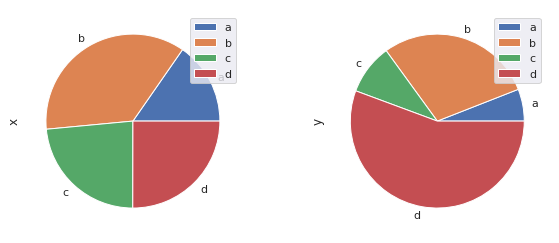

In [34]:
df = pd.DataFrame(3 * np.random.rand(4, 2),index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
ax = df.plot.pie(subplots=True, figsize=(10, 4))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

如果传递总和小于1.0的值，则matplotlib将绘制一个半圆。

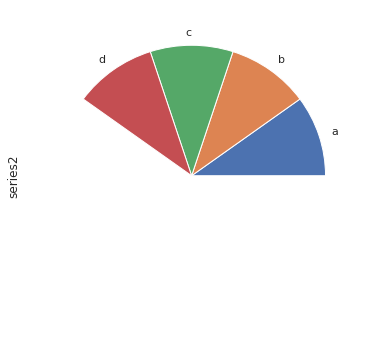

In [35]:
#如果传递总和小于1.0的值，则matplotlib将绘制一个半圆。
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series.plot.pie(figsize=(6, 6))

## 绘制缺失数据(Plotting with missing data)
Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.

| Plot Type | NaN Handling |
| ----- | ----- |
| Line | Leave gaps at NaNs |
| Line (stacked) | Fill 0’s |
| Bar | Fill 0’s |
| Scatter | Drop NaNs |
| Histogram | Drop NaNs (column-wise) |
| Box | Drop NaNs (column-wise) |
| Area | Fill 0’s |
| KDE | Drop NaNs (column-wise) |
| Hexbin | Drop NaNs |
| Pie | Fill 0’s |

If any of these defaults are not what you want, or if you want to be explicit about how missing values are handled, consider using **fillna()** or **dropna()** before plotting.